In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import Adam


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint


# First method: Using keras datasets

In [ ]:
data = keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

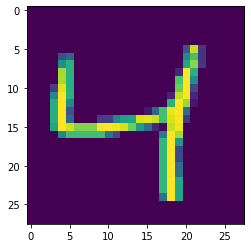

In [ ]:
plt.imshow(x_train[2].reshape(28, 28))

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

#plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train/255.
x_test = x_test/255.

In [ ]:
split = int(x_train.shape[0] * 0.8)

x_val = x_train[split:]
x_train = x_train[:split]

y_val = y_train[split:]
y_train = y_train[:split]


In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['acc']
    )

# model.compile(
#     loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     optimizer=keras.optimizers.RMSprop(),
#     metrics=["accuracy"],
# )

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_val, y_val))
# history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 17s 3ms/step - loss: 1.3215 - acc: 0.6207 - val_loss: 0.3442 - val_acc: 0.9073
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3320 - acc: 0.9081 - val_loss: 0.2638 - val_acc: 0.9273
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2658 - acc: 0.9245 - val_loss: 0.2302 - val_acc: 0.9367
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2336 - acc: 0.9334 - val_loss: 0.2081 - val_acc: 0.9417
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2054 - acc: 0.9411 - val_loss: 0.1894 - val_acc: 0.9469
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1847 - acc: 0.9465 - val_loss: 0.1774 - val_acc: 0.9493
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1694 - acc: 0.9501 - val_loss: 0.1682 - val_acc: 0.9538
Epoch 8/30
1500/1500 [==============================] - 3s 2m

In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 0.1002 - acc: 0.9700
Test loss: 0.10017666965723038
Test accuracy: 0.9700000286102295


7


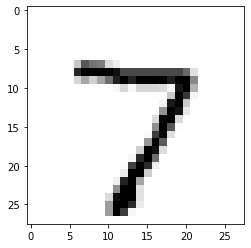

In [ ]:
print(np.argmax(model.predict(x_test[0:1, :])))
plt.imshow(x_test[0, :].reshape(28, 28), cmap='Greys')
plt.show()

# Second method: using the dataset in Kaggle

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/MNIST/train.csv')
test = pd.read_csv('/content/drive/MyDrive/MNIST/test.csv')
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,252,20,0,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


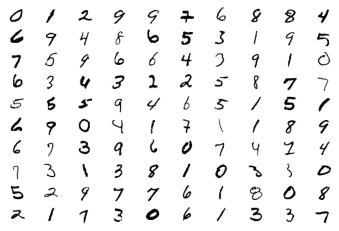

In [ ]:
for i in range(100):
  ax = plt.subplot(10,10, i+1)
  ax.axis('off')
  plt.imshow(x_train[randint(0, train.shape[0])].reshape(28, 28), cmap='Greys')

In [ ]:
model2 = Sequential()

model2.add(Dense(64, activation='relu', input_dim=784))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train_2 = train.drop(['label'], axis=1).to_numpy()
y_train_2 = train['label'].to_numpy()

x_test_2 = test.to_numpy()

In [ ]:
x_train_2 = x_train_2/255.
x_test_2 = x_test_2/255.

y_train_2 = to_categorical(y_train_2)

In [ ]:
model2.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
    )

In [ ]:
history = model2.fit(x_train_2, y_train_2, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
525/525 [==============================] - 3s 5ms/step - loss: 0.7172 - accuracy: 0.7882 - val_loss: 0.6852 - val_accuracy: 0.7975
Epoch 2/20
525/525 [==============================] - 1s 3ms/step - loss: 0.6881 - accuracy: 0.7974 - val_loss: 0.6590 - val_accuracy: 0.8058
Epoch 3/20
525/525 [==============================] - 1s 3ms/step - loss: 0.6625 - accuracy: 0.8051 - val_loss: 0.6347 - val_accuracy: 0.8123
Epoch 4/20
525/525 [==============================] - 1s 3ms/step - loss: 0.6395 - accuracy: 0.8118 - val_loss: 0.6126 - val_accuracy: 0.8193
Epoch 5/20
525/525 [==============================] - 1s 3ms/step - loss: 0.6191 - accuracy: 0.8177 - val_loss: 0.5933 - val_accuracy: 0.8230
Epoch 6/20
525/525 [==============================] - 2s 3ms/step - loss: 0.6006 - accuracy: 0.8228 - val_loss: 0.5762 - val_accuracy: 0.8286
Epoch 7/20
525/525 [==============================] - 2s 3ms/step - loss: 0.5838 - accuracy: 0.8281 - val_loss: 0.5599 - val_accuracy: 0.8343
Epoch 

In [86]:
ls = []
for i in range(x_test_2.shape[0]):
  ls.append(np.argmax(model2.predict(x_test_2[i:i+1, :])))
  
  # plt.imshow(x_test[0, :].reshape(28, 28), cmap='Greys')
  # plt.show()

In [94]:
data = {'ImageId':[i+1 for i in range(x_test_2.shape[0])], 'label':ls}
df_out = pd.DataFrame(data)


In [95]:
df_out

,ImageId,label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,2
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [96]:
df_out.to_csv('/content/drive/MyDrive/MNIST/out.csv', index=False)

-------------------Test1-----------------
Test result:  2 2


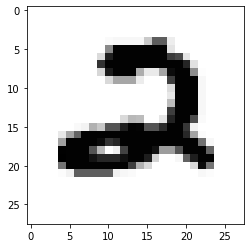

-------------------Test2-----------------
Test result:  0 0


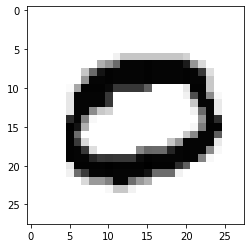

-------------------Test3-----------------
Test result:  9 9


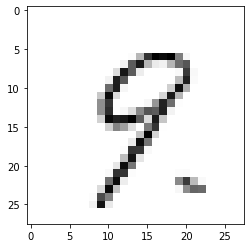

-------------------Test4-----------------
Test result:  4 4


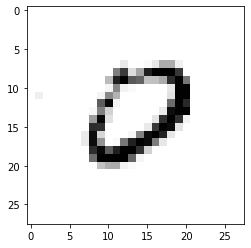

-------------------Test5-----------------
Test result:  2 2


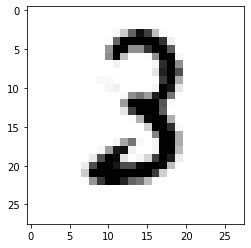

-------------------Test6-----------------
Test result:  7 7


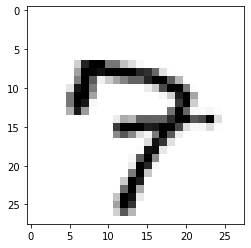

-------------------Test7-----------------
Test result:  0 0


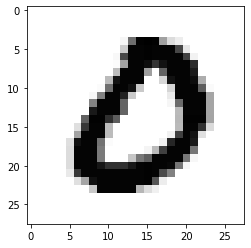

-------------------Test8-----------------
Test result:  3 3


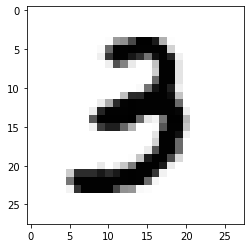

-------------------Test9-----------------
Test result:  0 0


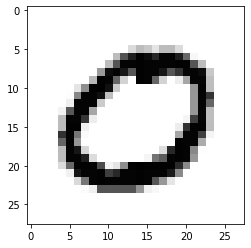

-------------------Test10-----------------
Test result:  3 3


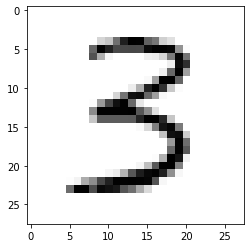

In [92]:
for i in range(10):
  print('-------------------Test{}-----------------'.format(i+1))
  # index = randint(0, x_test_2.shape[0])
  index = i
  print('Test result: ', np.argmax(model2.predict(x_test_2[index: index+1, :])), ls[i])
  plt.figure()
  plt.imshow(x_test_2[index, :].reshape(28, 28), cmap='Greys')
  plt.show()